<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r1_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [55]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [56]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Importing Dataset from GitHub

In [15]:
dfg1 = pd.read_csv('2-fft-normal-n-0-3-data-r1-good.csv')
dfg2 = pd.read_csv('2-fft-normal-n-0-5-data-r1-good.csv')
dfg3 = pd.read_csv('2-fft-normal-n-0-10-data-r1-good.csv')
dfg4 = pd.read_csv('2-fft-normal-n-0-12-data-r1-good.csv')
dfg5 = pd.read_csv('2-fft-normal-n-0-15-data-r1-good.csv')

dfm1 = pd.read_csv('2-fft-normal-n-0-3-data-r1-mal.csv')
dfm2 = pd.read_csv('2-fft-normal-n-0-5-data-r1-mal.csv')
dfm3 = pd.read_csv('2-fft-normal-n-0-10-data-r1-mal.csv')
dfm4 = pd.read_csv('2-fft-normal-n-0-12-data-r1-mal.csv')
dfm5 = pd.read_csv('2-fft-normal-n-0-15-data-r1-mal.csv')

Characteristics of Dataset

In [5]:
dfg1

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,...,2,4,8,1,4,0,3,27,9,1
1,84,4,2,1,1,4,3,9,3,3,...,2,4,8,1,4,8,3,27,9,1
2,216,2,4,1,1,4,3,9,0,0,...,1,1,8,1,4,20,3,27,9,1
3,342,2,4,1,1,4,3,9,0,0,...,1,1,8,1,4,28,3,27,9,1
4,388,1,2,1,1,4,3,9,3,3,...,1,1,2,1,4,32,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56912,3268816,4,2,6,2,2,3,9,18,2,...,5,25,8,12,24,480984,18,27,54,1
56913,3268823,4,2,6,3,2,3,9,18,2,...,8,40,8,18,36,721476,18,27,54,1
56914,3268830,4,2,6,4,2,3,9,18,2,...,9,45,8,24,48,961968,18,27,54,1
56915,3268837,4,2,6,5,3,3,9,18,2,...,8,40,8,30,90,1803690,18,27,54,1


In [6]:
dfm1

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,...,8,64,0,1,4,4,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,...,14,112,8,1,4,0,3,27,9,0
2,84,0,1,4,1,1,5,17,23,7,...,18,144,0,4,4,4,20,85,100,0
3,84,4,2,1,1,4,3,9,3,3,...,20,160,8,1,4,12,3,27,9,0
4,85,0,1,4,2,2,5,17,23,7,...,20,160,0,8,16,16,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89536,2490410,0,4,5,3,2,3,9,0,0,...,15,105,0,15,30,607980,15,27,45,0
89537,2490417,0,4,5,4,2,3,9,0,0,...,16,112,0,20,40,810640,15,27,45,0
89538,2490424,0,4,5,5,3,3,9,0,0,...,15,105,0,25,75,1519950,15,27,45,0
89539,2490425,0,4,1,1,4,3,10,0,0,...,12,84,0,1,4,81068,3,30,9,0


In [16]:
df1 = dfg1.append(dfm1, ignore_index=True,sort=False)
df1 = df1.sort_values('timestamp')
df1.to_csv('fft-r1-df1gm.csv',index=False)

df2 = dfg2.append(dfm2, ignore_index=True,sort=False)
df2 = df2.sort_values('timestamp')
df2.to_csv('fft-r1-df2gm.csv',index=False)

df3 = dfg3.append(dfm3, ignore_index=True,sort=False)
df3 = df3.sort_values('timestamp')
df3.to_csv('fft-r1-df3gm.csv',index=False)

df4 = dfg4.append(dfm4, ignore_index=True,sort=False)
df4 = df4.sort_values('timestamp')
df4.to_csv('fft-r1-df4gm.csv',index=False)

df5 = dfg5.append(dfm5, ignore_index=True,sort=False)
df5 = df5.sort_values('timestamp')
df5.to_csv('fft-r1-df5gm.csv',index=False)

In [18]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(146458, 30)
(90096, 30)
(86568, 30)
(90177, 30)
(127563, 30)


In [19]:
df1 = pd.read_csv('fft-r1-df1gm.csv')
df2 = pd.read_csv('fft-r1-df2gm.csv')
df3 = pd.read_csv('fft-r1-df3gm.csv')
df4 = pd.read_csv('fft-r1-df4gm.csv')
df5 = pd.read_csv('fft-r1-df5gm.csv')

In [20]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df.shape

(413299, 30)

In [21]:
df.to_csv('fft-r1-df.csv',index=False)

In [37]:
df = pd.read_csv('fft-r1-df.csv')

In [28]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [29]:
df = df.drop(columns=['timestamp','src_ni','src_router'])

In [30]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.294807,0.275217,0.012792,-0.019012,-0.318187,-0.170989,0.173205,0.062725,-0.038277,...,0.027952,0.016860,0.407948,0.145124,0.117898,0.066075,0.163004,-0.262599,-0.010720,0.063755
inport,-0.294807,1.000000,-0.168169,0.045435,-0.067502,-0.175422,-0.371519,0.372022,0.363596,0.031995,...,-0.173513,-0.140649,0.622549,-0.024615,-0.040455,-0.012946,-0.222646,-0.267054,-0.255481,0.224370
cache_coherence_type,0.275217,-0.168169,1.000000,0.348740,-0.518125,-0.100040,-0.147296,-0.172505,-0.060190,0.006150,...,0.013076,0.010936,0.027551,0.534495,0.431929,0.318323,0.943624,-0.123816,0.709275,-0.000537
flit_id,0.012792,0.045435,0.348740,1.000000,-0.063630,0.066628,-0.044901,0.121513,0.029508,0.018261,...,0.055910,0.034809,0.035175,0.968457,0.928169,0.707297,0.362852,0.019393,0.319275,-0.000457
flit_type,-0.019012,-0.067502,-0.518125,-0.063630,1.000000,-0.098985,0.066713,-0.180539,-0.043849,-0.027160,...,-0.010726,-0.010914,-0.052259,-0.152828,0.109141,0.078448,-0.539090,-0.028808,-0.474345,0.000696
vnet,-0.318187,-0.175422,-0.100040,0.066628,-0.098985,1.000000,0.885297,-0.575234,-0.217525,0.003823,...,0.102461,0.075119,-0.254251,-0.021959,-0.027672,-0.019715,0.234958,0.978742,0.630440,-0.204519
vc,-0.170989,-0.371519,-0.147296,-0.044901,0.066713,0.885297,1.000000,-0.600396,-0.224399,-0.003255,...,0.139552,0.107687,-0.383473,-0.114878,-0.081444,-0.065677,0.150633,0.961852,0.512308,-0.221392
dst_ni,0.173205,0.372022,-0.172505,0.121513,-0.180539,-0.575234,-0.600396,1.000000,0.730007,0.051293,...,-0.093883,-0.078632,0.362598,0.103603,0.022030,0.043502,-0.359894,-0.603204,-0.542126,0.168968
dst_router,0.062725,0.363596,-0.060190,0.029508,-0.043849,-0.217525,-0.224399,0.730007,1.000000,0.084486,...,-0.101967,-0.089536,0.338807,0.007277,-0.006550,0.038318,-0.131168,-0.226937,-0.201071,0.096153
traversal_id,-0.038277,0.031995,0.006150,0.018261,-0.027160,0.003823,-0.003255,0.051293,0.084486,1.000000,...,-0.025578,-0.024358,-0.003704,0.011343,0.006621,0.511177,0.007280,0.000814,0.007507,-0.033563


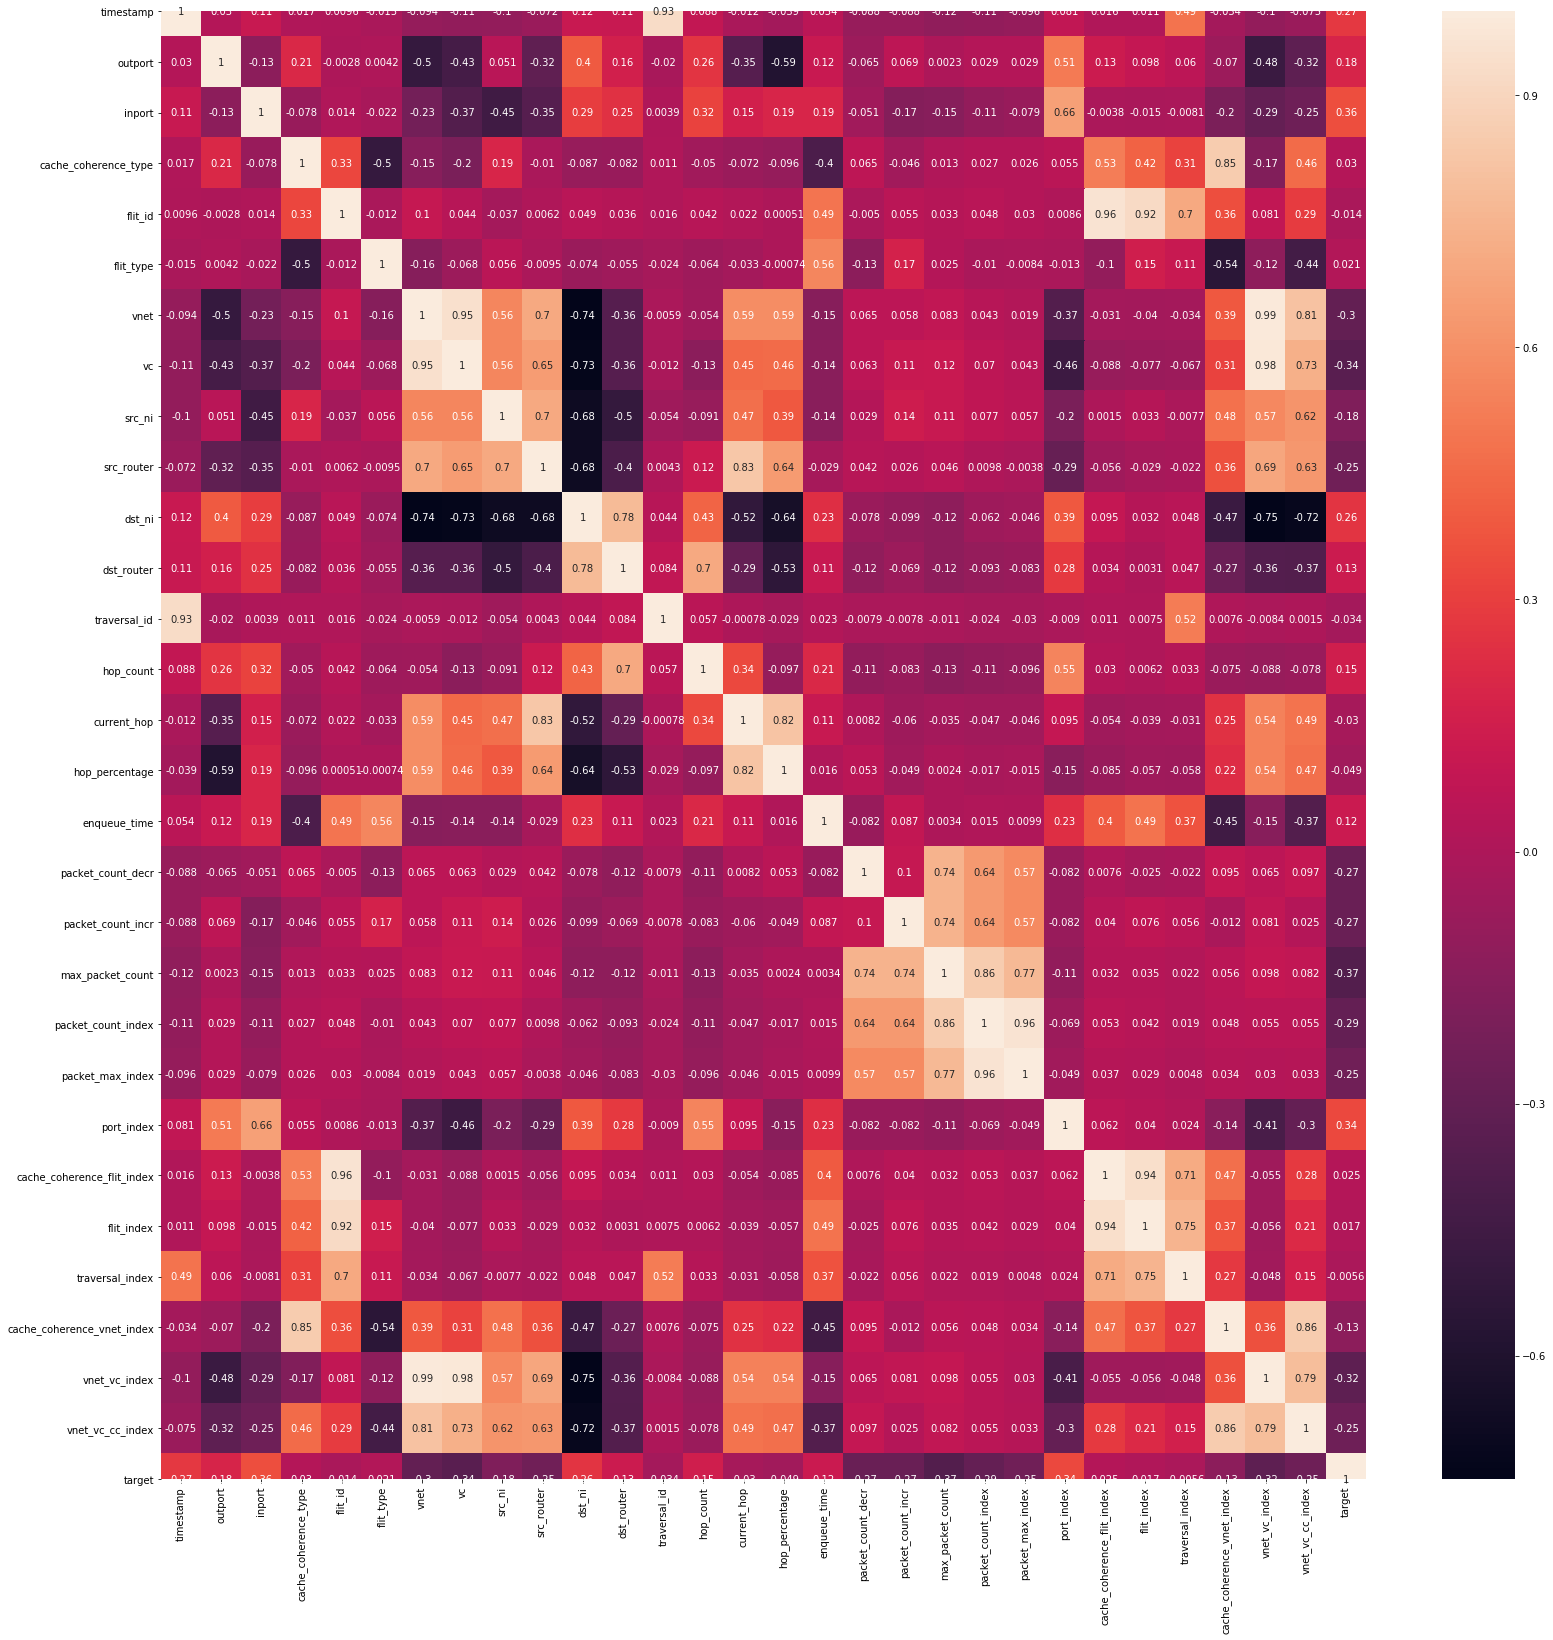

In [31]:
plt.figure(figsize=(27,27))
sns.heatmap(df1.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [36]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,...,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,23,7,1,...,7,7,49,0,1,4,4,3,27,9
1,2,4,1,1,4,3,9,23,7,0,...,7,12,84,8,1,4,0,3,27,9
2,2,4,1,1,4,3,9,23,7,0,...,1,1,1,8,1,4,0,3,27,9
3,0,1,4,1,1,5,17,1,1,1,...,7,15,105,0,4,4,4,20,85,100
4,0,1,4,2,2,5,17,1,1,1,...,7,16,112,0,8,16,16,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127558,4,2,6,2,2,3,9,20,4,20056,...,1,1,1,8,12,24,481344,18,27,54
127559,4,2,6,3,2,3,9,20,4,20056,...,1,1,1,8,18,36,722016,18,27,54
127560,4,2,6,4,2,3,9,20,4,20056,...,1,1,1,8,24,48,962688,18,27,54
127561,4,2,6,5,3,3,9,20,4,20056,...,1,1,1,8,30,90,1805040,18,27,54


In [33]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,...,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000048,...,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000000,...,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000000,...,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.50,0.000000,0.00,1.000000,0.0,0.000,0.774194,0.533333,0.000095,...,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
4,0.0,0.25,0.500000,0.00,0.000000,1.0,1.000,0.032258,0.066667,0.000048,...,0.205882,0.052632,0.012611,0.0,0.103448,0.000000,0.000002,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413294,1.0,0.50,0.833333,0.50,0.333333,0.0,0.000,0.645161,0.266667,0.956439,...,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.382776,0.833333,0.000000,0.494505
413295,1.0,0.50,0.833333,0.75,0.333333,0.0,0.000,0.645161,0.266667,0.956439,...,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.510369,0.833333,0.000000,0.494505
413296,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000,0.645161,0.266667,0.956439,...,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.956941,0.833333,0.000000,0.494505
413297,1.0,0.50,0.166667,0.00,1.000000,0.0,0.125,0.645161,0.266667,0.956486,...,0.000000,0.000000,0.000000,1.0,0.034483,0.046512,0.085066,0.166667,0.051724,0.098901


In [57]:
train_X[train_X.duplicated()].shape

(19155, 26)

In [58]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router'])

In [59]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,...,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000049,...,0.171429,0.017595,0.003899,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000000,...,0.171429,0.032258,0.006742,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.25,0.500000,0.00,0.000000,1.0,1.000,0.032258,0.066667,0.000049,...,0.171429,0.041056,0.008448,0.0,0.103448,0.000000,0.000002,0.944444,1.000000,1.000000
4,0.0,0.25,0.500000,0.25,0.333333,1.0,1.000,0.032258,0.066667,0.000049,...,0.171429,0.043988,0.009016,0.0,0.241379,0.139535,0.000009,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127558,1.0,0.50,0.833333,0.25,0.333333,0.0,0.000,0.645161,0.266667,0.987397,...,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.263526,0.833333,0.000000,0.494505
127559,1.0,0.50,0.833333,0.50,0.333333,0.0,0.000,0.645161,0.266667,0.987397,...,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.395289,0.833333,0.000000,0.494505
127560,1.0,0.50,0.833333,0.75,0.333333,0.0,0.000,0.645161,0.266667,0.987397,...,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.527053,0.833333,0.000000,0.494505
127561,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000,0.645161,0.266667,0.987397,...,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.988224,0.833333,0.000000,0.494505


In [60]:
test_Y = df5['target']

Principal Component Analysis

In [ ]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.64894488, -0.58167798,  1.12720849, ..., -0.42048508,
         0.2037091 ,  0.14312388],
       [-1.17985237, -1.04458142,  0.19417825, ..., -0.2612297 ,
         0.32731373, -0.12405735],
       [-1.18208239, -1.04899514,  0.18991562, ..., -0.29148007,
         0.29306108, -0.12575219],
       ...,
       [-0.83019465, -0.0718037 , -0.79523449, ...,  0.52680074,
        -0.05996826, -0.19769899],
       [-0.86311132,  0.24090666, -1.13666379, ...,  0.56018567,
        -0.14058299, -0.13975863],
       [-1.14783925, -0.88618297,  0.16332467, ...,  0.49353525,
        -0.10833544, -0.278676  ]])

In [ ]:
pca.explained_variance_ratio_

array([0.35898442, 0.14709688, 0.13420395, 0.11533491, 0.06557082,
       0.04053465, 0.03417099, 0.03236276, 0.02455299])

Text(0, 0.5, 'Variance')

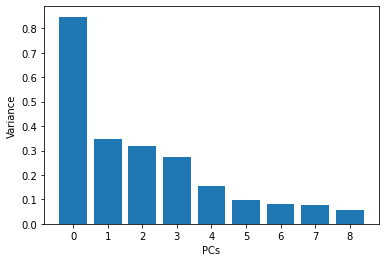

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [ ]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.648945,-0.581678,1.127208,0.504565,0.615123,-0.103176,-0.420485,0.203709,0.143124
1,-1.179852,-1.044581,0.194178,-0.257829,0.678856,0.041939,-0.261230,0.327314,-0.124057
2,-1.182082,-1.048995,0.189916,-0.260239,0.675118,0.039748,-0.291480,0.293061,-0.125752
3,1.074696,0.090882,0.340148,-1.083700,-0.207006,-0.270496,-0.382658,0.258443,-0.119409
4,1.058472,0.261353,0.149799,-0.912602,0.070492,-0.223968,-0.406446,0.255473,-0.071182
...,...,...,...,...,...,...,...,...,...
121922,-0.828951,-0.451888,-0.327994,-0.183684,-0.267633,0.097103,0.558432,-0.054646,-0.135260
121923,-0.829513,-0.261684,-0.561458,-0.031766,-0.191972,0.068066,0.543729,-0.056037,-0.166464
121924,-0.830195,-0.071804,-0.795234,0.120047,-0.116435,0.038780,0.526801,-0.059968,-0.197699
121925,-0.863111,0.240907,-1.136664,0.398320,0.230708,0.085350,0.560186,-0.140583,-0.139759


In [ ]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,-1.864513e-15,-1.456487e-15,4.555182e-16,-1.990700e-16,2.832525e-16,4.440881e-16,7.076771e-16,-1.543752e-15,-0.128650
1,-1.864513e-15,1.000000e+00,3.350930e-16,-1.200178e-15,2.746793e-16,-3.506849e-17,-2.477423e-16,-5.009203e-17,7.932553e-16,-0.229395
2,-1.456487e-15,3.350930e-16,1.000000e+00,-2.041391e-16,-3.898314e-16,4.882922e-16,-1.835045e-16,-5.432693e-17,-8.242890e-16,-0.265397
3,4.555182e-16,-1.200178e-15,-2.041391e-16,1.000000e+00,2.135570e-16,3.920200e-16,4.077598e-16,2.255656e-16,-1.604025e-15,-0.090684
4,-1.990700e-16,2.746793e-16,-3.898314e-16,2.135570e-16,1.000000e+00,-4.076699e-16,-2.208132e-16,3.603058e-17,-1.840452e-16,-0.022073
5,2.832525e-16,-3.506849e-17,4.882922e-16,3.920200e-16,-4.076699e-16,1.000000e+00,2.349828e-16,5.000133e-18,7.060489e-17,0.176355
6,4.440881e-16,-2.477423e-16,-1.835045e-16,4.077598e-16,-2.208132e-16,2.349828e-16,1.000000e+00,9.219485e-16,8.026048e-16,-0.306005
7,7.076771e-16,-5.009203e-17,-5.432693e-17,2.255656e-16,3.603058e-17,5.000133e-18,9.219485e-16,1.000000e+00,-3.297494e-17,-0.218864
8,-1.543752e-15,7.932553e-16,-8.242890e-16,-1.604025e-15,-1.840452e-16,7.060489e-17,8.026048e-16,-3.297494e-17,1.000000e+00,-0.116594
target,-1.286499e-01,-2.293948e-01,-2.653973e-01,-9.068444e-02,-2.207301e-02,1.763549e-01,-3.060055e-01,-2.188644e-01,-1.165937e-01,1.000000


In [ ]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

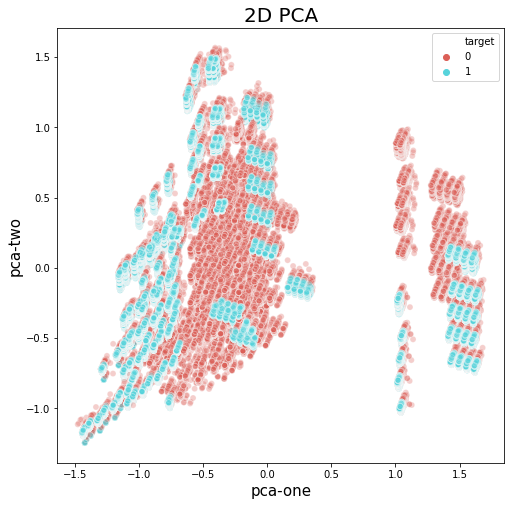

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

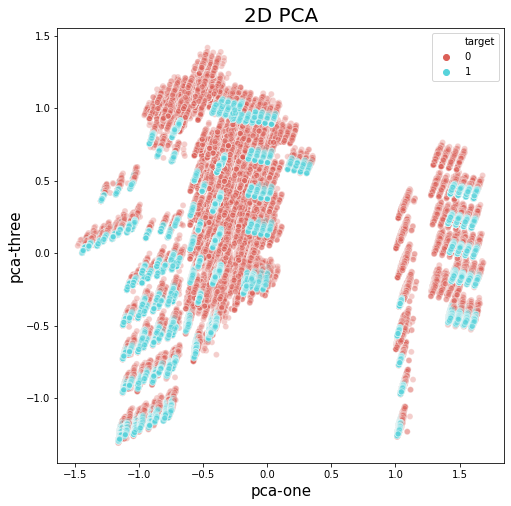

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

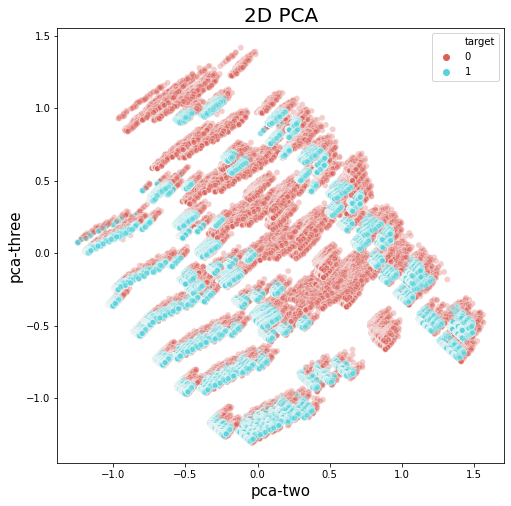

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

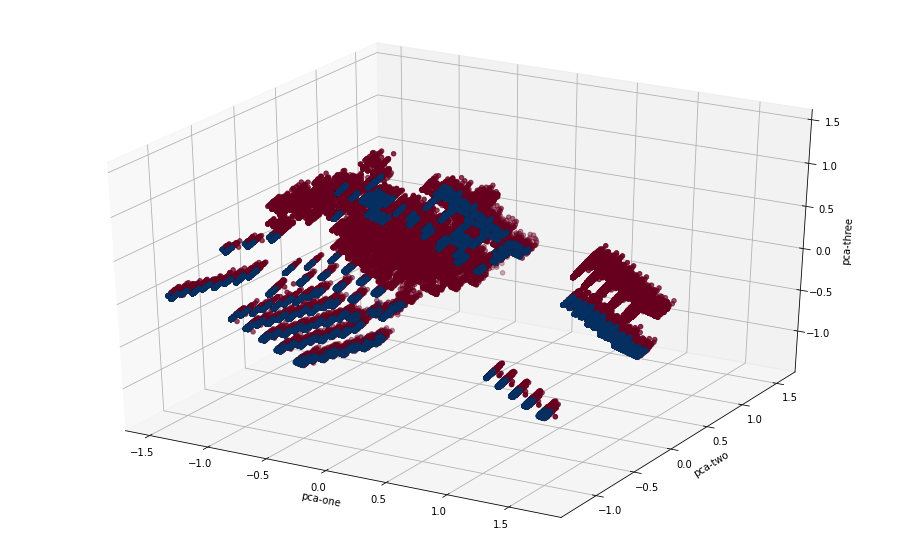

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

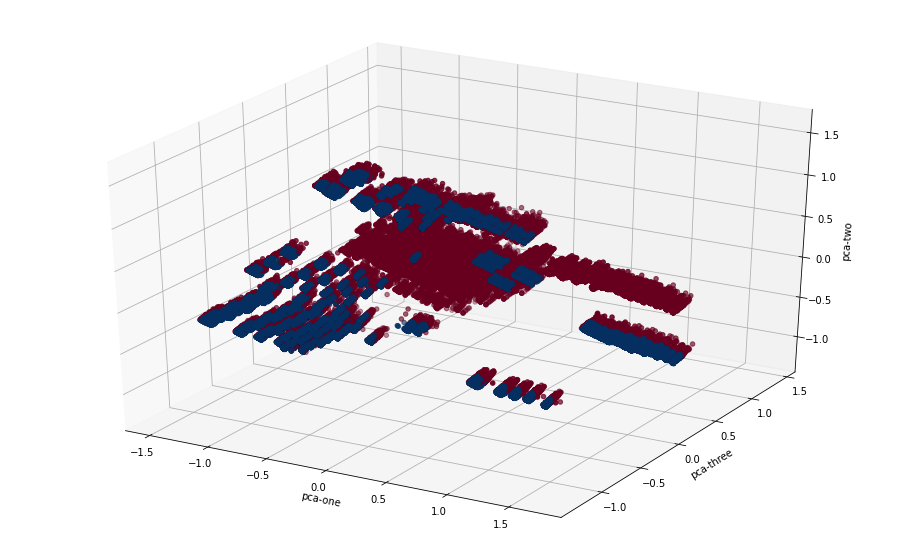

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

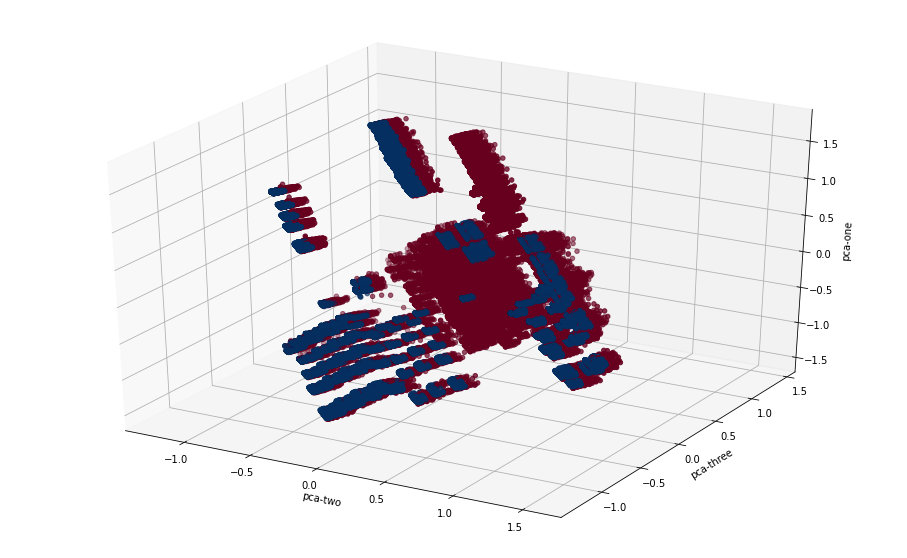

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 549.2652952671051 seconds


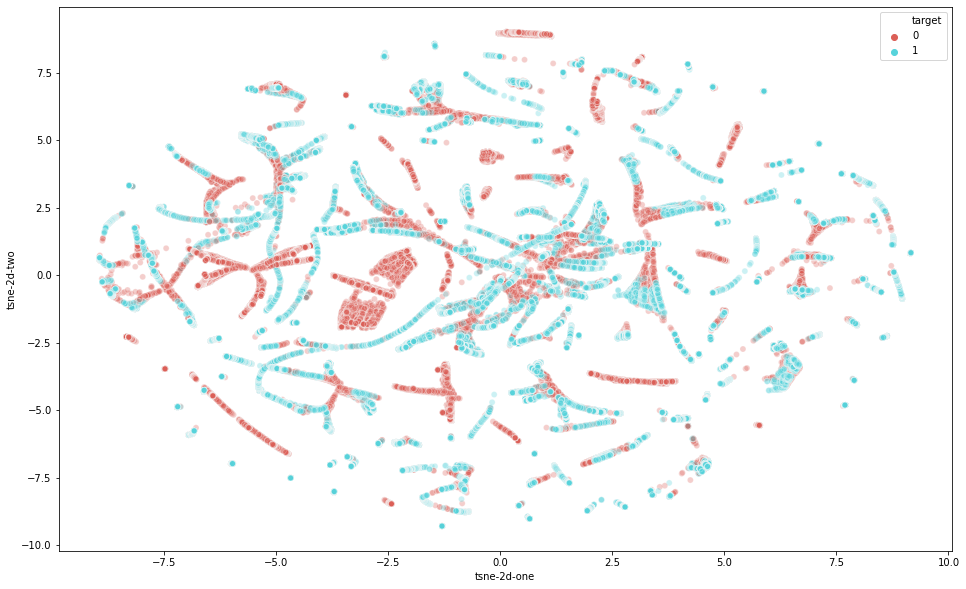

In [ ]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

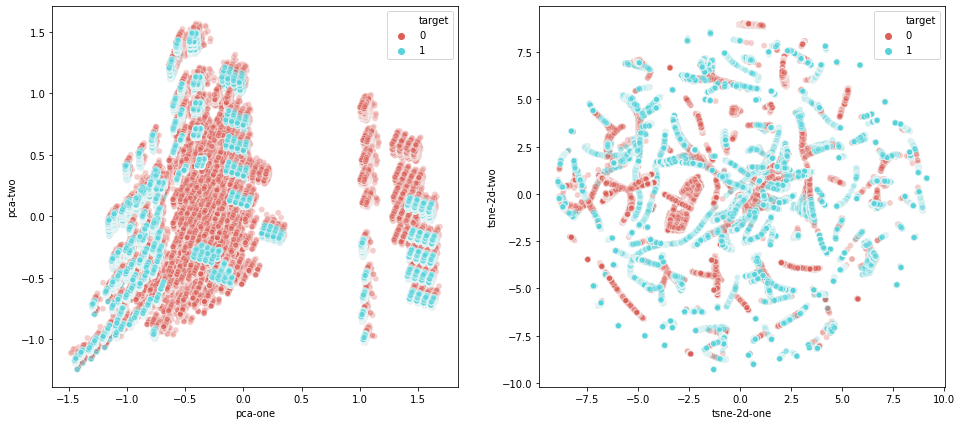

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 449.93573236465454 seconds


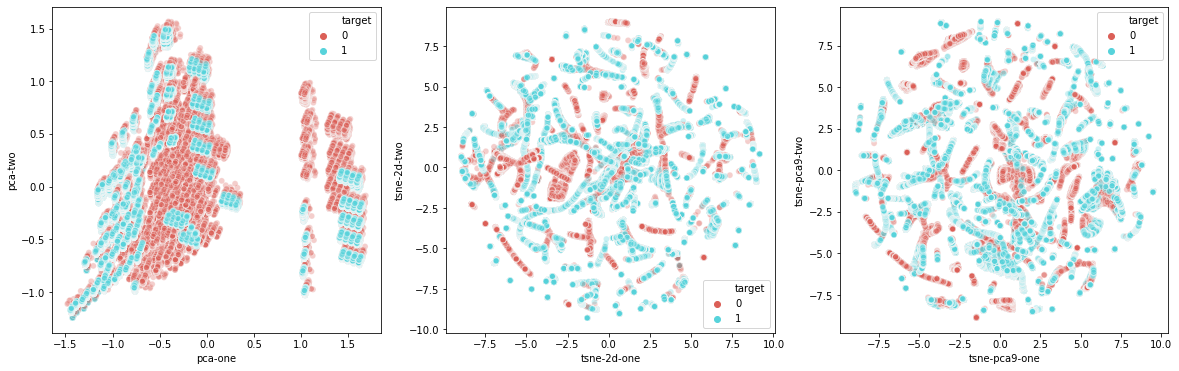

In [ ]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [61]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [62]:
train_Y = df['target']
train_Y.value_counts()

0    217876
1    195423
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [63]:
seed = 5
np.random.seed(seed)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.1, random_state=seed, shuffle=True)

Feature Selection

                         Specs         Score
5                         vnet  14850.083125
24               vnet_vc_index  10929.640672
6                           vc   8583.140579
16            max_packet_count   6037.256598
19                  port_index   5238.893972
1                       inport   4902.773142
14           packet_count_decr   3026.049482
15           packet_count_incr   3011.215451
17          packet_count_index   2662.577726
18            packet_max_index   1696.927200
7                       dst_ni    840.479587
25            vnet_vc_cc_index    819.227239
8                   dst_router    735.059133
0                      outport    393.276420
10                   hop_count    220.267682
12              hop_percentage    211.448106
23  cache_coherence_vnet_index    206.637260


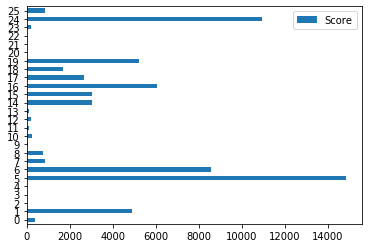

In [75]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [76]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [77]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.608860
         Iterations: 35


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                      Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.120      
Dependent Variable:          target                   AIC:                      503326.6917
Date:                        2020-05-13 23:27         BIC:                      503567.1940
No. Observations:            413299                   Log-Likelihood:           -2.5164e+05
Df Model:                    21                       LL-Null:                  -2.8587e+05
Df Residuals:                413277                   LLR p-value:              0.0000     
Converged:                   0.0000                   Scale:                    1.0000     
No. Iterations:              35.0000                                                       
-------------------------------------------------------------------------------------------
                            Coef.     Std.Err.      z     P>|z|      [0.025       0.975]   
---------------------------

In [69]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 65.18589761038473
Test Prediction  65.57706266634405


In [71]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.242209731662


In [72]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
17,packet_count_index,3.162006
2,cache_coherence_type,2.464703
1,inport,2.097351
0,outport,1.478914
6,vc,1.467629
11,current_hop,1.017161
7,dst_ni,0.909388
3,flit_id,0.835072
4,flit_type,0.476230
12,hop_percentage,0.057106


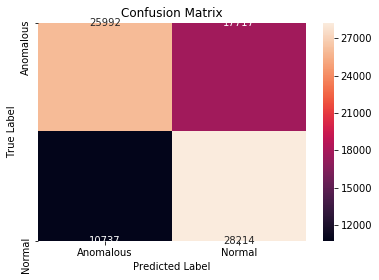

In [73]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     14371
           1       0.75      0.80      0.77     10015

    accuracy                           0.81     24386
   macro avg       0.80      0.80      0.80     24386
weighted avg       0.81      0.81      0.81     24386



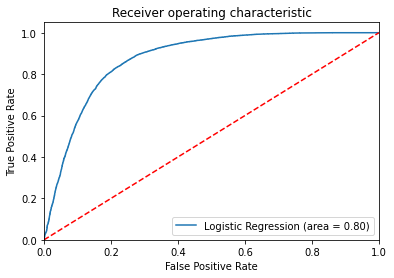

In [63]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [64]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn= knn.predict(X_test)

In [66]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.78233768364072
Test Prediction  87.33289592389075


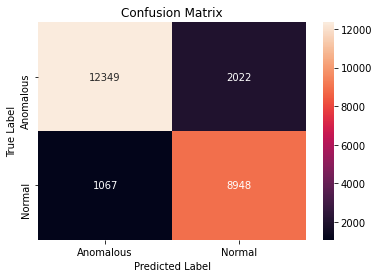

In [67]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     14371
           1       0.82      0.89      0.85     10015

    accuracy                           0.87     24386
   macro avg       0.87      0.88      0.87     24386
weighted avg       0.88      0.87      0.87     24386



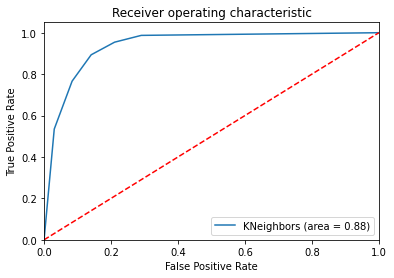

In [69]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [ ]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [71]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb= nb.predict(X_test)

In [73]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 71.13931577490492
Test Prediction Score 71.40572459607972


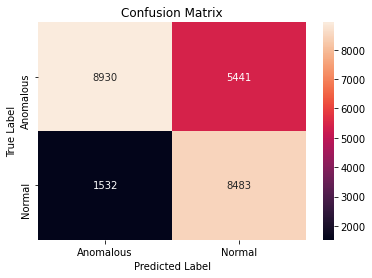

In [74]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [75]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72     14371
           1       0.61      0.85      0.71     10015

    accuracy                           0.71     24386
   macro avg       0.73      0.73      0.71     24386
weighted avg       0.75      0.71      0.71     24386



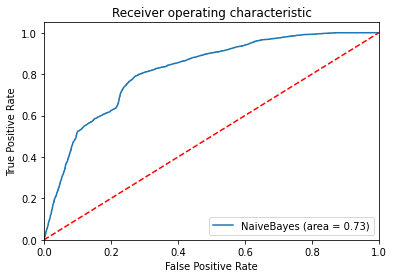

In [76]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [ ]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [78]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 78032 samples, validate on 19509 samples
Epoch 1/10
78032/78032 [==============================] - 3s 36us/step - loss: 0.1771 - accuracy: 0.7379 - val_loss: 0.1494 - val_accuracy: 0.7969
Epoch 2/10
78032/78032 [==============================] - 3s 33us/step - loss: 0.1499 - accuracy: 0.7959 - val_loss: 0.1478 - val_accuracy: 0.7947
Epoch 3/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1487 - accuracy: 0.7949 - val_loss: 0.1468 - val_accuracy: 0.7933
Epoch 4/10
78032/78032 [==============================] - 3s 35us/step - loss: 0.1480 - accuracy: 0.7953 - val_loss: 0.1465 - val_accuracy: 0.7925
Epoch 5/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1475 - accuracy: 0.7961 - val_loss: 0.1457 - val_accuracy: 0.7954
Epoch 6/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1472 - accuracy: 0.7961 - val_loss: 0.1453 - val_accuracy: 0.7953
Epoch 7/10
78032/78032 [==============================] - 3s 34us/st

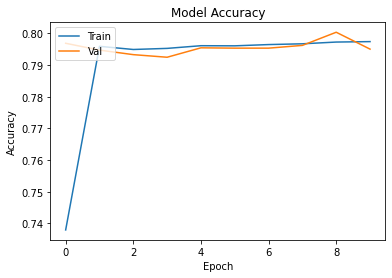

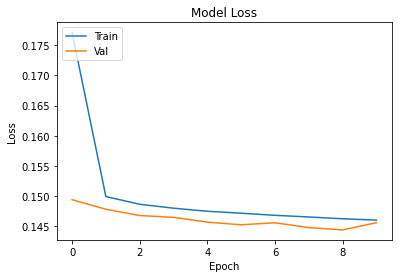

In [79]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [80]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.74%


3-Layer Neural Network

In [83]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 78032 samples, validate on 19509 samples
Epoch 1/15
78032/78032 [==============================] - 3s 36us/step - loss: 0.2441 - accuracy: 0.5793 - val_loss: 0.2424 - val_accuracy: 0.5886
Epoch 2/15
78032/78032 [==============================] - 3s 34us/step - loss: 0.2422 - accuracy: 0.5891 - val_loss: 0.2421 - val_accuracy: 0.5886
Epoch 3/15
78032/78032 [==============================] - 3s 33us/step - loss: 0.2420 - accuracy: 0.5891 - val_loss: 0.2419 - val_accuracy: 0.5886
Epoch 4/15
78032/78032 [==============================] - 3s 36us/step - loss: 0.2416 - accuracy: 0.5891 - val_loss: 0.2413 - val_accuracy: 0.5886
Epoch 5/15
78032/78032 [==============================] - 3s 34us/step - loss: 0.2393 - accuracy: 0.5892 - val_loss: 0.2345 - val_accuracy: 0.6008
Epoch 6/15
78032/78032 [==============================] - 3s 33us/step - loss: 0.2210 - accuracy: 0.6545 - val_loss: 0.2067 - val_accuracy: 0.6940
Epoch 7/15
78032/78032 [==============================] - 3s 33us/st

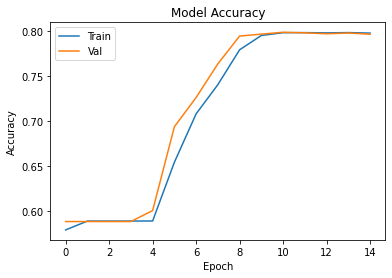

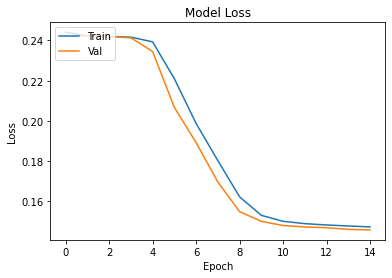

In [84]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [85]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.00%


4-Layer Neural Network



In [86]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 78032 samples, validate on 19509 samples
Epoch 1/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2434 - accuracy: 0.5891 - val_loss: 0.2420 - val_accuracy: 0.5886
Epoch 2/30
78032/78032 [==============================] - 3s 34us/step - loss: 0.2418 - accuracy: 0.5891 - val_loss: 0.2417 - val_accuracy: 0.5886
Epoch 3/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2414 - accuracy: 0.5891 - val_loss: 0.2411 - val_accuracy: 0.5886
Epoch 4/30
78032/78032 [==============================] - 3s 36us/step - loss: 0.2406 - accuracy: 0.5891 - val_loss: 0.2401 - val_accuracy: 0.5886
Epoch 5/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2389 - accuracy: 0.5891 - val_loss: 0.2370 - val_accuracy: 0.5886
Epoch 6/30
78032/78032 [==============================] - 3s 36us/step - loss: 0.2294 - accuracy: 0.5891 - val_loss: 0.2139 - val_accuracy: 0.5886
Epoch 7/30
78032/78032 [==============================] - 3s 36us/st

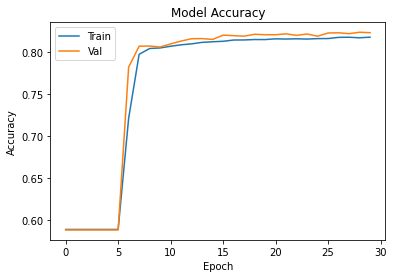

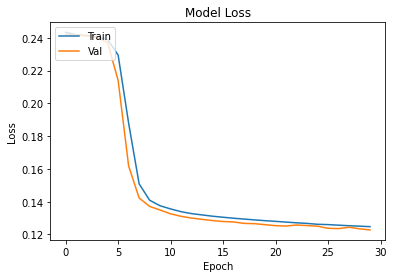

In [87]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [88]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.11%


5-Layer Neural Network Optimized

In [98]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 78032 samples, validate on 19509 samples
Epoch 1/100
78032/78032 [==============================] - 6s 73us/step - loss: 0.1303 - accuracy: 0.8096 - val_loss: 0.1168 - val_accuracy: 0.8288
Epoch 2/100
78032/78032 [==============================] - 5s 65us/step - loss: 0.1194 - accuracy: 0.8248 - val_loss: 0.1115 - val_accuracy: 0.8355
Epoch 3/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1165 - accuracy: 0.8298 - val_loss: 0.1082 - val_accuracy: 0.8383
Epoch 4/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1142 - accuracy: 0.8348 - val_loss: 0.1059 - val_accuracy: 0.8468
Epoch 5/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1131 - accuracy: 0.8362 - val_loss: 0.1156 - val_accuracy: 0.8279
Epoch 6/100
78032/78032 [==============================] - 5s 64us/step - loss: 0.1120 - accuracy: 0.8384 - val_loss: 0.1041 - val_accuracy: 0.8495
Epoch 7/100
78032/78032 [==============================] - 5s 

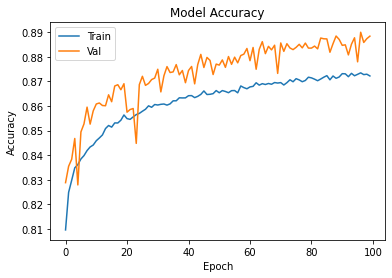

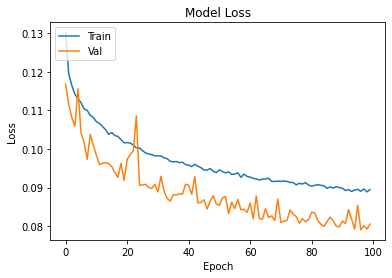

In [103]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [104]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.81%


Decision Tree Classifier

In [ ]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.9315262089598747


In [115]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_dt= dt.predict(X_test)

In [117]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 99.13779846423554
Test Prediction Score 95.66144509144591


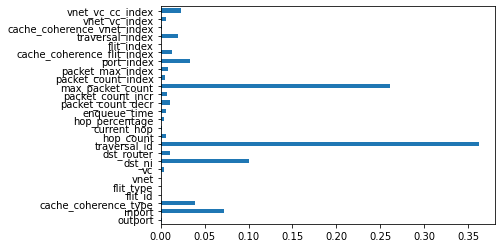

In [118]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

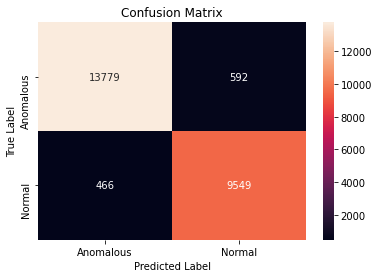

In [119]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [120]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14371
           1       0.94      0.95      0.95     10015

    accuracy                           0.96     24386
   macro avg       0.95      0.96      0.96     24386
weighted avg       0.96      0.96      0.96     24386



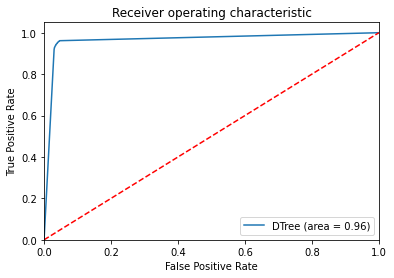

In [121]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [ ]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [123]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf= rf.predict(X_test)

In [125]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.74267231215592
Test Prediction Score 95.88698433527433


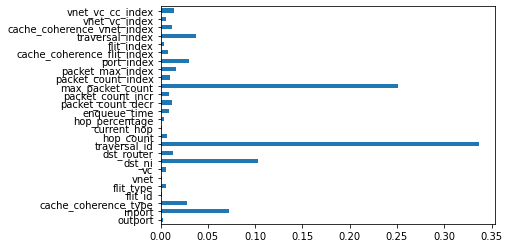

In [126]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

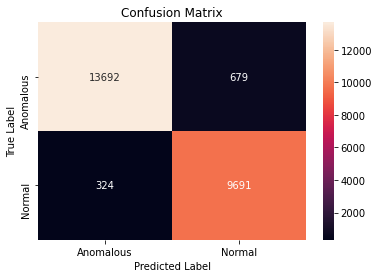

In [127]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [128]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     14371
           1       0.93      0.97      0.95     10015

    accuracy                           0.96     24386
   macro avg       0.96      0.96      0.96     24386
weighted avg       0.96      0.96      0.96     24386



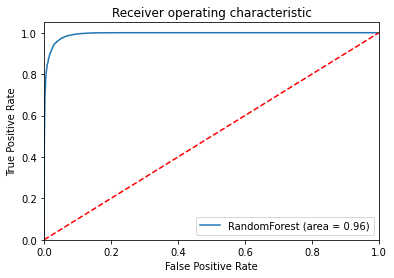

In [129]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [ ]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [131]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgbc= xgbc.predict(X_test)

In [133]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.89440337909187
Test Prediction Score 97.86762896744034


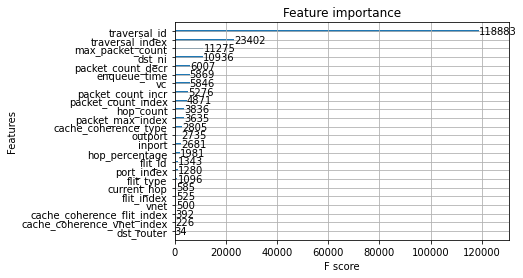

In [134]:
plot_importance(xgbc)
plt.show()

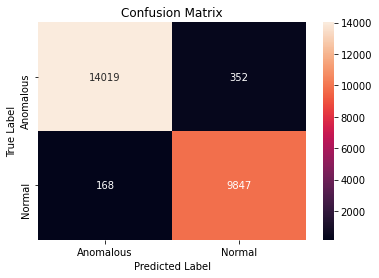

In [135]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [136]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14371
           1       0.97      0.98      0.97     10015

    accuracy                           0.98     24386
   macro avg       0.98      0.98      0.98     24386
weighted avg       0.98      0.98      0.98     24386



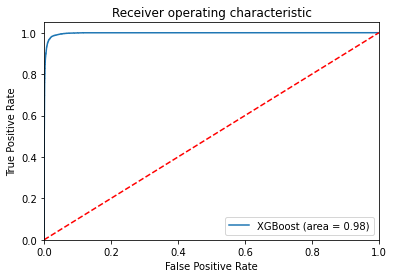

In [137]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [ ]:
#lightgbm
import lightgbm as lgb

In [ ]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

Best parameters: {'learning_rate': 0.2, 'n_estimators': 38}
Accuracy : 0.9121924746743849


In [ ]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
y_pred_gbm= gbm.predict(X_test)

In [ ]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 96.03232030873131
Test Prediction Score 93.42165957664908


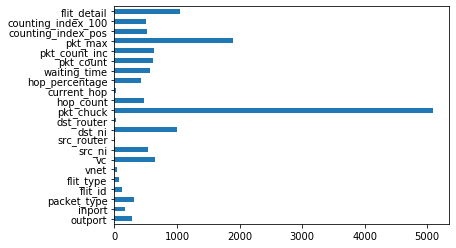

In [ ]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

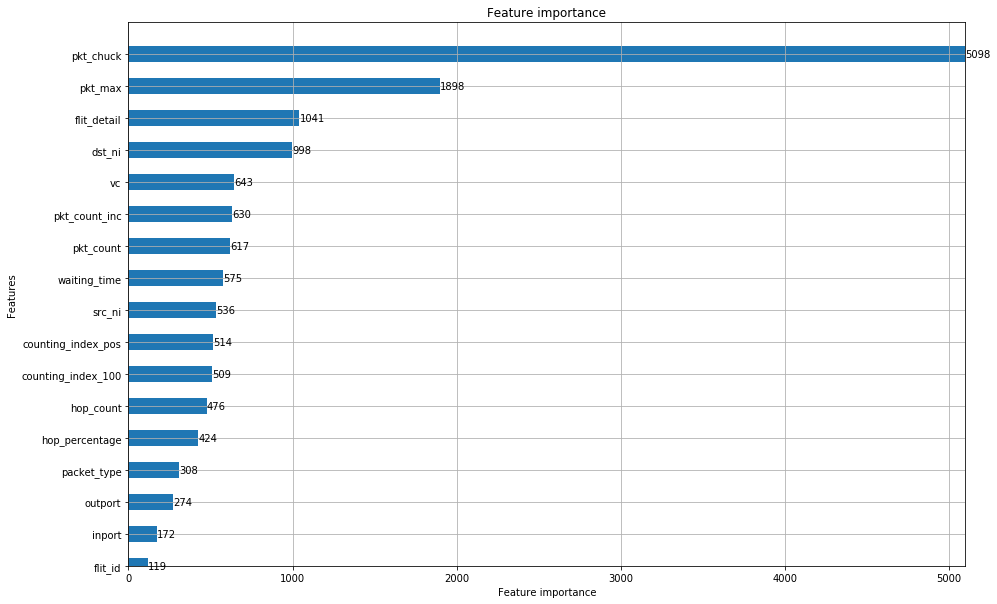

In [ ]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5100), ylim = (0,17), figsize = (15,10))
plt.show()

In [ ]:
sorted(gbm.feature_importances_,reverse=True)

[5098,
 1898,
 1041,
 998,
 643,
 630,
 617,
 575,
 536,
 514,
 509,
 476,
 424,
 308,
 274,
 172,
 119,
 68,
 44,
 23,
 20,
 13]

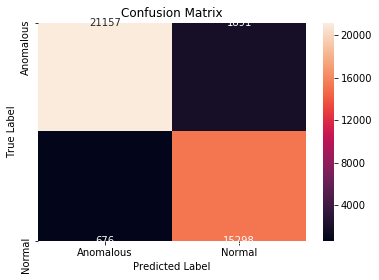

In [ ]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     23048
           1       0.89      0.96      0.92     15974

    accuracy                           0.93     39022
   macro avg       0.93      0.94      0.93     39022
weighted avg       0.94      0.93      0.93     39022



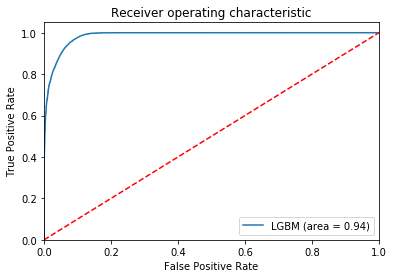

In [ ]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()